In [1]:
##setting environment

In [2]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import os
os.chdir('/content/gdrive/MyDrive/11777_hws/project/github/11777-Project/')

In [4]:
!ls

all_emb.txt	data	     meta.txt		  README.md
answer_emb.txt	file1.txt    qualitative_samples  tsne_answers.png
answers.png	get_data.sh  question_emb.txt	  tsne_questions.png
common		language     questions.png	  vec.txt


In [5]:
!pip install flair

     |████████████████████████████████| 319 kB 32.4 MB/s 
     |████████████████████████████████| 1.2 MB 35.4 MB/s 
     |████████████████████████████████| 19.7 MB 3.5 MB/s 
     |████████████████████████████████| 56 kB 4.5 MB/s 
     |████████████████████████████████| 48 kB 4.8 MB/s 
     |████████████████████████████████| 788 kB 34.7 MB/s 
     |████████████████████████████████| 2.9 MB 49.7 MB/s 
     |████████████████████████████████| 981 kB 32.6 MB/s 
     |████████████████████████████████| 64 kB 2.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 62 kB 938 kB/s 
     |████████████████████████████████| 3.3 MB 58.3 MB/s 
     |████████████████████████████████| 895 kB 48.8 MB/s 
     |████████████████████████████████| 636 kB 45.2 MB/s 
  Created wheel for gdown: filename=gdown-3.12.2-py3-none-any.whl size=9704 sha256=e2c651de994a7a781450f8ff8554b1417825201e0bb21

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [7]:
from flair.embeddings import WordEmbeddings, DocumentPoolEmbeddings
from flair.data import *
# initialize the word embeddings
glove_embedding = WordEmbeddings('glove')

# initialize the document embeddings, mode = mean
document_embeddings = DocumentPoolEmbeddings([glove_embedding])

2021-10-10 20:16:13,578 https://flair.informatik.hu-berlin.de/resources/embeddings/token/glove.gensim.vectors.npy not found in cache, downloading to /tmp/tmp1_4khnxl


100%|██████████| 160000128/160000128 [00:06<00:00, 25614866.99B/s]

2021-10-10 20:16:20,149 copying /tmp/tmp1_4khnxl to cache at /root/.flair/embeddings/glove.gensim.vectors.npy


2021-10-10 20:16:20,443 removing temp file /tmp/tmp1_4khnxl
2021-10-10 20:16:21,134 https://flair.informatik.hu-berlin.de/resources/embeddings/token/glove.gensim not found in cache, downloading to /tmp/tmpji_r3vln


100%|██████████| 21494764/21494764 [00:01<00:00, 15009391.26B/s]

2021-10-10 20:16:22,880 copying /tmp/tmpji_r3vln to cache at /root/.flair/embeddings/glove.gensim
2021-10-10 20:16:22,917 removing temp file /tmp/tmpji_r3vln


In [8]:
## sampling data for qualitative analysis

In [57]:
from common.get_data import BasicDataProvider
import os

In [58]:
def sample_by_type(bdp, type_str, n=50):
    if type_str not in ['what', 'why', 'how', 'who', 'when', 'where', 'which']:
        raise AssertionError("Please provide only ['what', 'why', 'how', 'who', 'when', 'where', 'which'] for type_str")
    result = []
    while len(result) < n:
        sample = bdp.sampleImageQAPair()['qa_pair']
        if sample['type'] == type_str:
            result.append(sample)
    return result


In [59]:
def write_W(questions, answers, type_str, path='qualitative_samples/'):
    with open(os.path.join(path + '{}{}.txt'.format(type_str, len(questions))), 'w') as out:
        for q, ans in zip(questions, answers):
            out.write(q)
            out.write('\n')
            for a in ans: # ans[0] is the true answer
                out.write(str(a))
                out.write('\n')
            out.write('\n')


In [60]:
bdp_6w = BasicDataProvider(dataset_root='../../datasets/visual7w-telling', 
                           dataset_name = 'dataset.json')
bdp_which = BasicDataProvider(dataset_root='../../datasets/visual7w-pointing', 
                            dataset_name = 'dataset.json')
sevenWs = ['what', 'why', 'how', 'who', 'when', 'where', 'which']

Initializing data provider for dataset dataset.json...
BasicDataProvider: reading ../../datasets/visual7w-telling/dataset.json
Initializing data provider for dataset dataset.json...
BasicDataProvider: reading ../../datasets/visual7w-pointing/dataset.json


In [61]:
sample_7Ws = []

In [62]:
for type_str in sevenWs:
        bdp = bdp_which if type_str == 'which' else bdp_6w
        sample_7Ws.append(sample_by_type(bdp, type_str, 2))

In [63]:
sample_7Ws

[[{'answer': 'Trash can.',
   'image_id': 2336775,
   'multiple_choices': ['Boxes.', 'A footstool.', 'Payment.'],
   'qa_id': 526155,
   'question': 'What is under the table?',
   'type': 'what'},
  {'answer': 'Bronze.',
   'image_id': 2358100,
   'multiple_choices': ['White.', 'Black.', 'Grey.'],
   'qa_id': 317168,
   'question': 'What color is the car to the far right?',
   'type': 'what'}],
 [{'answer': 'To fly a kite.',
   'image_id': 2342065,
   'multiple_choices': ['To sing.', 'To dance.', 'To act.'],
   'qa_id': 841763,
   'question': 'Why is the boy there?',
   'type': 'why'},
  {'answer': 'To fly a kite.',
   'image_id': 2393443,
   'multiple_choices': ['To enjoy the sunny weather.',
    'To play a game.',
    'To buy produce.'],
   'qa_id': 224888,
   'question': 'Why are they out there?',
   'type': 'why'}],
 [{'answer': 'Two.',
   'image_id': 2341428,
   'multiple_choices': ['Six.', 'One.', 'Ten.'],
   'qa_id': 650320,
   'question': 'How many trees are there?',
   'type':

In [64]:
sample_7Ws_questions = []
sample_7Ws_answers = []
for sample_W in sample_7Ws:
  questions = [x['question'] for x in sample_W]
  # Grab answers as [true_ans, false_ans1, false_ans2, false_ans3]
  answers = [[x['answer']] + x['multiple_choices'] for x in sample_W]
  sample_7Ws_questions.append(questions)
  sample_7Ws_answers.append(answers)
  # Output each W's questions to a text file
  for questions, answers, w_type in zip(sample_7Ws_questions, sample_7Ws_answers, sevenWs):
        write_W(questions, answers, w_type)


In [65]:
## embeddings for sampled data

In [66]:
def read_samples(path, n=20):
    questions, true_ans, false_ans = [], [], []
    with open(path, 'r') as f:
        for i, line in enumerate(f):
            if i % 6 == 0:
                questions.append(line.rstrip())
            elif i % 6 == 1:
                true_ans.append(line.rstrip())
            elif i % 6 == 2:
                false_ans.append(line.rstrip())
            if len(false_ans) >= n:
                break
    return questions, true_ans, false_ans




In [67]:
def get_glove_embedding(question):
  sentence = Sentence(question)
  document_embeddings.embed(sentence)
  sentence_embedding= sentence.embedding.numpy()
  return sentence_embedding

In [68]:
categories = ['what', 'why', 'how', 'who', 'when', 'where', 'which']

In [69]:
questions_all = []
true_answers_all = []
false_answers_all = []

In [70]:
 for type_str in categories:
    path = os.path.join('qualitative_samples/', type_str + '2.txt')
    questions, true_ans, false_ans = read_samples(path)
    questions_all.append(questions)
    true_answers_all.append(true_ans)
    false_answers_all.append(false_ans)



In [71]:
questions_all[0][-1], true_answers_all[0][-1], false_answers_all[0][-1]

('What color is the car to the far right?', 'Bronze.', 'White.')

In [72]:
questions_embeddings = [[get_glove_embedding(q) for q in questions] for questions in questions_all]
true_answers_embeddings = [[get_glove_embedding(ta) for ta in true_answers] for true_answers in true_answers_all]
false_answers_embeddings = [[get_glove_embedding(fa) for fa in false_answers] for false_answers in false_answers_all]

In [73]:
true_embed_all = np.vstack(true_answers_embeddings)
false_embed_all = np.vstack(false_answers_embeddings)

In [74]:
true_embed_all.shape, false_embed_all.shape


((14, 100), (14, 100))

In [75]:
ans_embed_all = np.vstack((true_embed_all, false_embed_all))

In [76]:
ans_embed_all.shape

(28, 100)

In [77]:
questions_embed_all = np.vstack(questions_embeddings)

In [78]:
questions_embed_all.shape

(14, 100)

In [79]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [80]:
tsne = TSNE(n_components=2, init='random', random_state=0)
features = tsne.fit_transform(questions_embed_all)

In [81]:
features[:20].shape

(14, 2)

In [82]:
labels = np.repeat([0, 1, 2, 3, 4, 5, 6], 2)

In [83]:
labels

array([0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6])

In [84]:
import pandas as pd
df = pd.DataFrame(labels, columns=['y'])

In [85]:
colors = ['red', 'black', 'blue', 'yellow', 'green', 'orange', 'brown']

In [86]:
df['tsne1'] = features[:, 0]
df['tsne2'] = features[:, 1]

In [87]:
df

,y,tsne1,tsne2
0,0,1.425140,-203.131439
1,0,93.696953,-55.018154
2,1,141.694016,25.320429
3,1,-126.233505,5.739788
4,2,-59.868134,101.519302
5,2,151.966629,133.119141
6,3,12.542690,-101.441658
7,3,49.372585,57.773476
8,4,203.505997,-84.541840
9,4,119.923477,-166.068970


In [88]:
import seaborn as sns

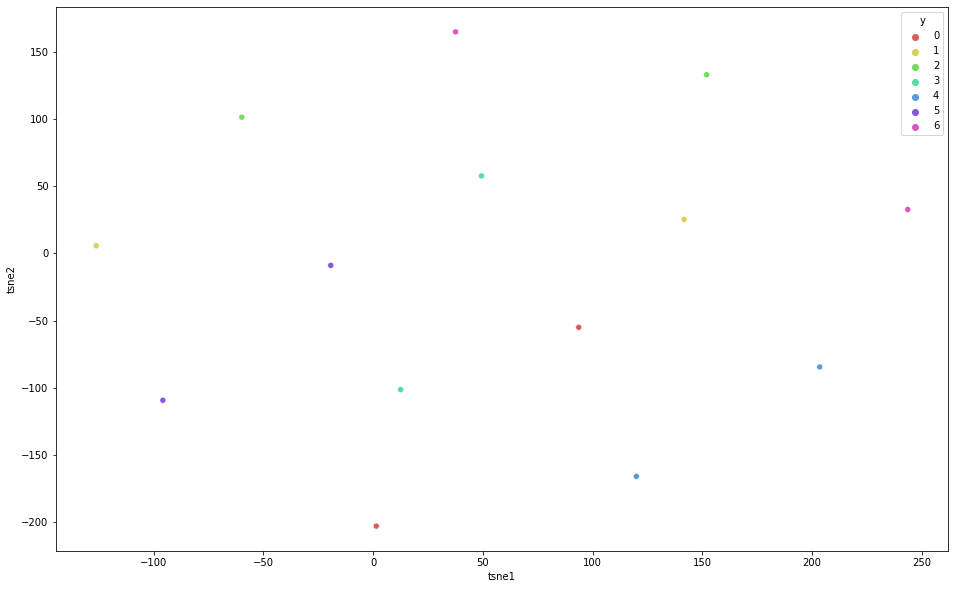

In [89]:
plt.figure(figsize=(16,10))
sns_plot = sns.scatterplot(
    x="tsne1", y="tsne2",
    hue="y",
    palette=sns.color_palette("hls", 7),
    data=df,
    legend="full"
)



In [90]:
sns_plot.figure.savefig("tsne_questions.png")

In [91]:
tsne = TSNE(n_components=2, init='random', random_state=0)
features = tsne.fit_transform(ans_embed_all)

In [92]:
labels = np.repeat([0, 1], 14)

In [93]:
df = pd.DataFrame(labels, columns=['y'])

In [94]:
df['tsne1'] = features[:, 0]
df['tsne2'] = features[:, 1]

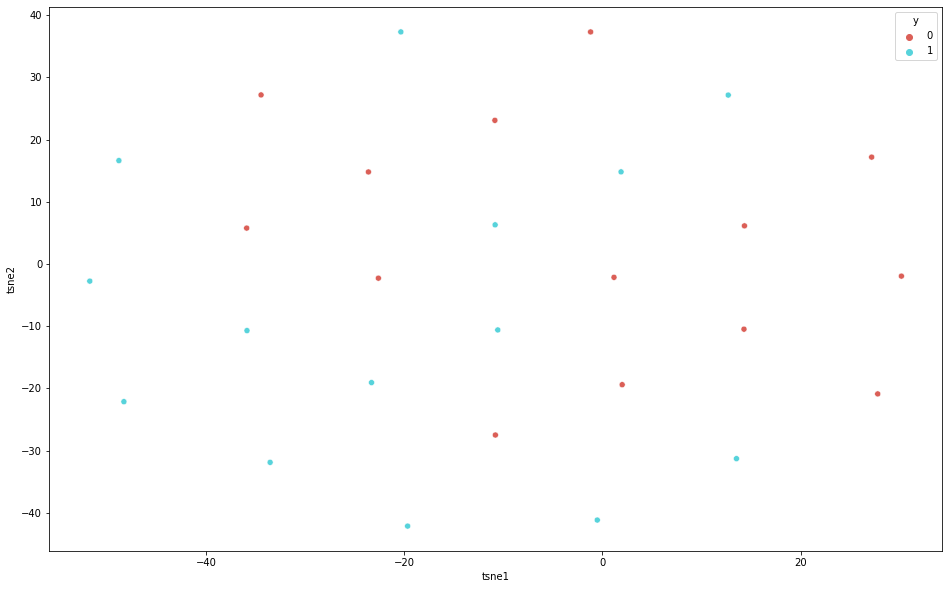

In [95]:
plt.figure(figsize=(16,10))
sns_plot = sns.scatterplot(
    x="tsne1", y="tsne2",
    hue="y",
    palette=sns.color_palette("hls", 2),
    data=df,
    legend="full"
)



In [96]:
sns_plot.figure.savefig("tsne_answers.png")

In [97]:
np.savetxt("question_emb.txt",(questions_embed_all),newline='\n', delimiter='\t')
np.savetxt("answer_emb.txt",(ans_embed_all),newline='\n', delimiter='\t')
# np.savetxt("file1.txt",(sentence_embedding1,sentence_embedding2,sentence_embedding3),newline='\n', delimiter='\t')

In [98]:
all_ques=[]
for que_type in questions_all:
    for que in que_type:
      print(que)
      all_ques.append(que)

What is under the table?
What color is the car to the far right?
Why is the boy there?
Why are they out there?
How many trees are there?
How many people are riding bikes?
Who wearing the jacket?
Who is wearing a dark blue shirt?
When was the photo taken?
When would you use the toilet paper?
Where was the picture taken?
Where are the players playing?
Which is the messiest part of the image?
Which part of the traffic pole has the yield on green sign?


In [99]:
all_ans=[]
for ans_type in true_answers_all:
    for ans in ans_type:
      print(ans)
      all_ans.append(ans)
for ans_type in false_answers_all:
    for ans in ans_type:
      print(ans)
      all_ans.append(ans)

Trash can.
Bronze.
To fly a kite.
To fly a kite.
Two.
One.
A woman.
The man.
At a gathering.
After you use bathroom.
In front of a clock.
Baseball field.
381627
990423
Boxes.
White.
To sing.
To enjoy the sunny weather.
Six.
Three.
The skier.
The boy.
Summer.
To blow your noise.
At city hall.
Soccer field.
381645
990430


In [100]:
with open('meta.txt', 'w') as f:
  for q in all_ques:
    f.write(q +"\n")
  for a in all_ans:
    f.write(a +"\n")
f.close()

In [101]:
f1= open('question_emb.txt' , 'r') 
que_emb= f1.read()
f1= open('answer_emb.txt' , 'r') 
ans_emb= f1.read()

In [102]:
with open('vec.txt', 'w') as f:
  f.write(que_emb)
  f.write(ans_emb)
f.close()

In [103]:
## for more qualitative analysis-
##download files  'meta.txt' and 'vec.txt' and upload it here 'https://projector.tensorflow.org/' by clicking 'Load' button and then  select T-SNE for visualisation

In [ ]:
##############################################################